# Задание 1

In [69]:
# Импортируйте библиотеки pandas, numpy и matplotlib.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [70]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
# Создайте датафреймы X и y из этих данных.

from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)

In [71]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки 
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [72]:
# Масштабируйте данные с помощью StandardScaler.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [73]:
# Постройте модель TSNE на тренировочных данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

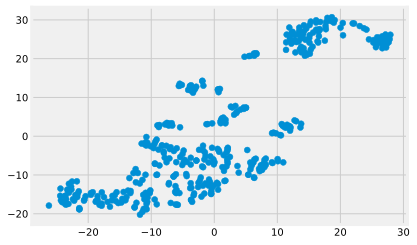

In [74]:
# Постройте диаграмму рассеяния на этих данных.

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

# Задание 2

In [85]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
# используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [86]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [87]:
labels_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [88]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

In [90]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.

kmeans.cluster_centers_

array([[-0.39886419,  1.55761113, -1.01661835, -0.09789972, -1.11157102,
         0.4694394 , -1.31625943,  1.43008074, -0.59047541, -0.58513831,
        -0.60269912,  0.35449756, -0.82802167],
       [ 0.81090356, -0.50032012,  1.12900228,  0.08796453,  1.14538259,
        -0.49660815,  0.77912417, -0.85778857,  1.2424768 ,  1.31237242,
         0.60373924, -0.65731177,  0.90021762],
       [-0.35959388, -0.36865917, -0.29295347, -0.014409  , -0.26109152,
         0.1188348 ,  0.07460493, -0.07354866, -0.56028098, -0.60915918,
        -0.1300668 ,  0.277444  , -0.22574751]])

Text(20, 15, 'Кластер 2')

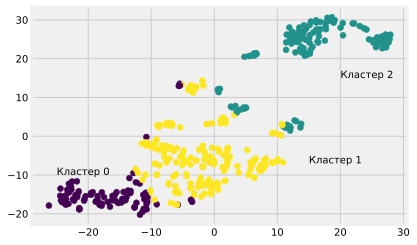

In [93]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)
plt.text(-25, -10, 'Кластер 0')
plt.text(15, -7, 'Кластер 1')
plt.text(20, 15, 'Кластер 2')

Text(0.5, 0, 'Цена')

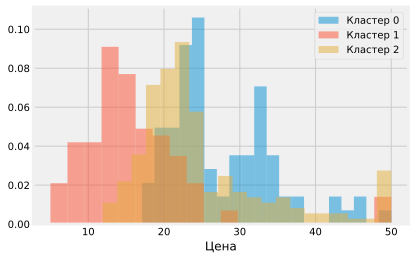

In [102]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

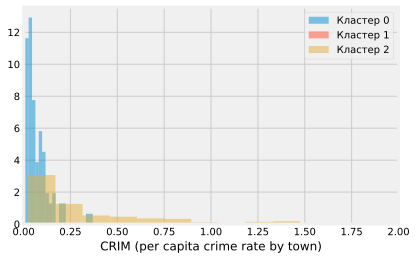

In [120]:
plt.hist(X_train.loc[labels_train==0,'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1,'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train==2,'CRIM'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 2)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM (per capita crime rate by town)')

In [103]:
# Вычислите средние значения price и CRIM в разных кластерах.

X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [104]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [105]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

In [106]:
y_train[labels_train==0].mean()

27.78837209302326

In [107]:
y_train[labels_train==1].mean()

16.165354330708663

In [108]:
y_train[labels_train==2].mean()

24.958115183246072

# Задание 3

In [121]:
# Примените модель KMeans, построенную в предыдущем задании,
# к данным из тестового набора.

labels_test = kmeans.predict(X_test_scaled)

In [122]:
labels_test

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2])

In [124]:
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

X_test.loc[labels_test==0, 'CRIM'].mean()

0.062060000000000004

In [125]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [126]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.26607882352941176

In [127]:
y_test[labels_test==0].mean()

31.35

In [128]:
y_test[labels_test==1].mean()

16.43714285714286

In [129]:
y_test[labels_test==2].mean()

21.860784313725492